In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
A=pd.read_csv("/content/test4.csv")
A_x=np.array(A['x']).reshape(-1,1)
A_y=np.array(A['y']).reshape(-1,1)
A_z=np.array(A['z']).reshape(-1,1)

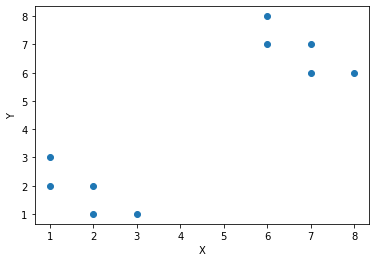

In [ ]:
x=np.arange(0,10)
plt.scatter(A_x,A_y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
data=np.column_stack((A_x, A_y))
data

array([[1, 2],
       [2, 1],
       [3, 1],
       [1, 3],
       [2, 2],
       [7, 7],
       [6, 8],
       [8, 6],
       [7, 6],
       [6, 7]])

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input,train_output,test_output=train_test_split(data, A_z)

In [ ]:
test_input

array([[6, 7],
       [8, 6],
       [1, 2]])

In [ ]:
from sklearn import svm
svc=svm.SVC(kernel = 'linear', C=1) #C high=no exception, hyper parameter
#svc=svm.SVC(kernel = 'poly', C=1)
#svc=svm.SVC(kernel = 'rbf', C=1)

In [ ]:
svc.fit(train_input,train_output)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear')

In [ ]:
svc.predict(test_input)

array([1, 1, 0])

In [ ]:
test_output

array([[1],
       [1],
       [0]])

In [ ]:
svc.score(test_input,test_output)

1.0

In [ ]:
coef=np.array(svc.coef_) # coefficient
coef

array([[0.22215348, 0.22227722]])

In [ ]:
a2=coef[0][1]
a1=coef[0][0]

In [ ]:
inter=svc.intercept_
inter

array([-1.88882015])

In [ ]:
a=-(a1/a2) #slope
b=-(inter[0]/a2) #y axis
#y=ax+b
a,b

(-0.9994433263392276, 8.497587747469984)

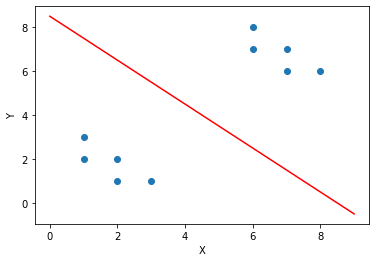

In [ ]:
x=np.arange(0,10)
plt.plot(x,a*x+b,'r')
plt.scatter(A_x,A_y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()